In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../current_metadata_ena.tsv', sep='\t')
df.index = df.run_accession

/Users/mvandenb/miniconda3/envs/sars_cov2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,5,9,21,27,31,35,53,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
date = pd.read_csv('../accession_and_date.tsv', sep='\t', header=None)

In [4]:
date.columns = ['accession', 'date']

In [5]:
by_date = date.date.value_counts()

Text(0.5, 1.0, 'All published SRA/ENA accessions by date')

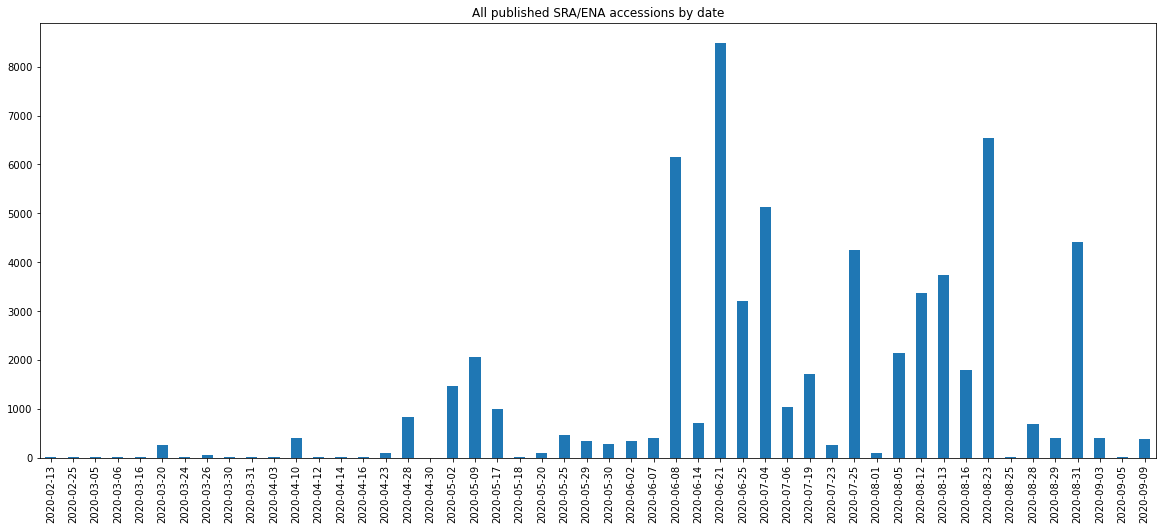

In [6]:
by_date.sort_index().plot(kind='bar', figsize=(20, 8)).set_title("All published SRA/ENA accessions by date")

In [7]:
date['is_sra'] = date.accession.str.startswith('SRR')

In [8]:
by_date_by_center = date.groupby(['date', 'is_sra']).count().reset_index()

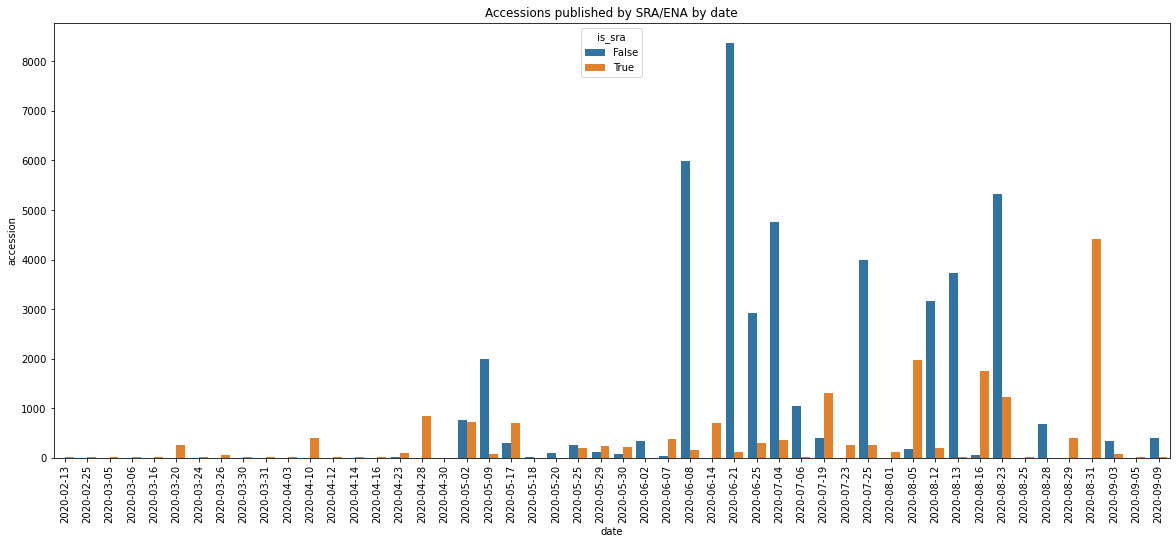

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x='date', y='accession', hue='is_sra', data=by_date_by_center, ax=ax)
ax.set_title('Accessions published by SRA/ENA by date')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [10]:
instruments = df.groupby(['instrument_platform', 'instrument_model']).count()['accession'].reset_index()
instruments

,instrument_platform,instrument_model,accession
0,BGISEQ,BGISEQ-500,1
1,CAPILLARY,AB 3730xL Genetic Analyzer,7
2,ILLUMINA,Illumina Genome Analyzer,3
3,ILLUMINA,Illumina HiSeq 1500,13
4,ILLUMINA,Illumina HiSeq 2000,4
5,ILLUMINA,Illumina HiSeq 2500,2449
6,ILLUMINA,Illumina HiSeq 4000,56
7,ILLUMINA,Illumina MiSeq,8758
8,ILLUMINA,Illumina MiniSeq,39
9,ILLUMINA,Illumina NovaSeq 6000,14008


In [11]:
df.groupby(['library_strategy', 'instrument_platform']).count()['accession'].reset_index()

,library_strategy,instrument_platform,accession
0,AMPLICON,CAPILLARY,7
1,AMPLICON,ILLUMINA,36307
2,AMPLICON,ION_TORRENT,411
3,AMPLICON,OXFORD_NANOPORE,13010
4,OTHER,ILLUMINA,75
5,RNA-Seq,ILLUMINA,3339
6,RNA-Seq,ION_TORRENT,6
7,RNA-Seq,OXFORD_NANOPORE,5
8,Targeted-Capture,ILLUMINA,711
9,WGA,BGISEQ,1


Text(0.5, 1.0, 'Desposited accessions by Country')

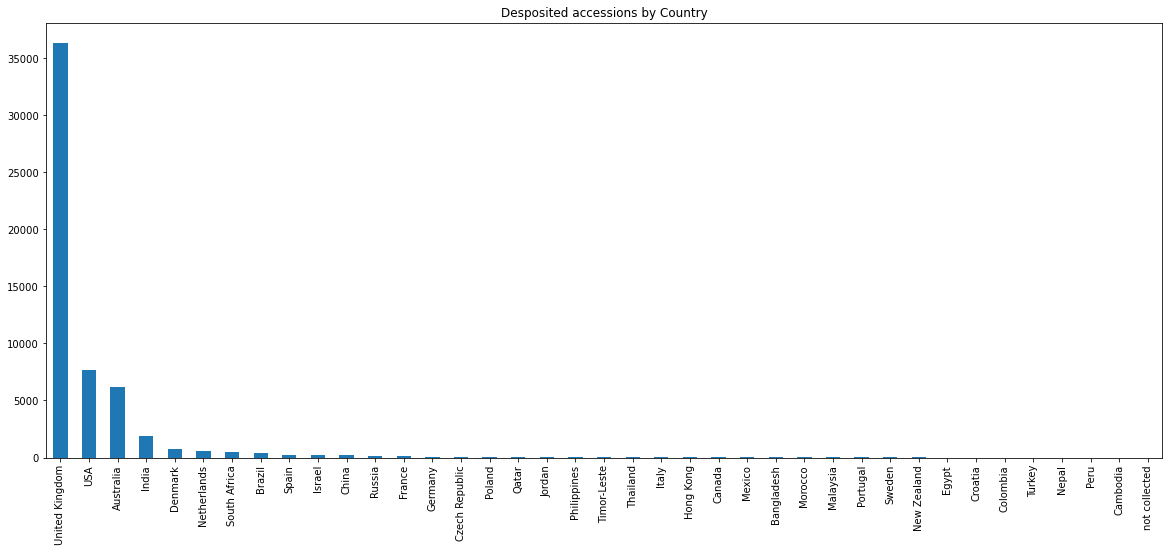

In [12]:
df.country.str.replace(':.*', '').value_counts().plot(kind='bar', figsize=(20, 8)).set_title("Desposited accessions by Country")

In [13]:
df['sex'] = df.apply(axis=1, func=lambda row: row['host_sex'] or row['submitted_host_sex'])
df.sex.value_counts()

male      3568
female    3515
Name: sex, dtype: int64

In [14]:
df.isolation_source.value_counts()

nasopharyngeal swab                                                                     4863
human                                                                                   1211
patient isolate                                                                         1106
not collected                                                                            584
nasopharyngeal swabs                                                                     584
nasal swab                                                                               458
Oro-pharyngeal swab                                                                      378
not provided                                                                             334
Nasopharyngeal/oropharyngeal swab                                                        300
nasopharyngeal                                                                           258
not collected&apos;                                                   

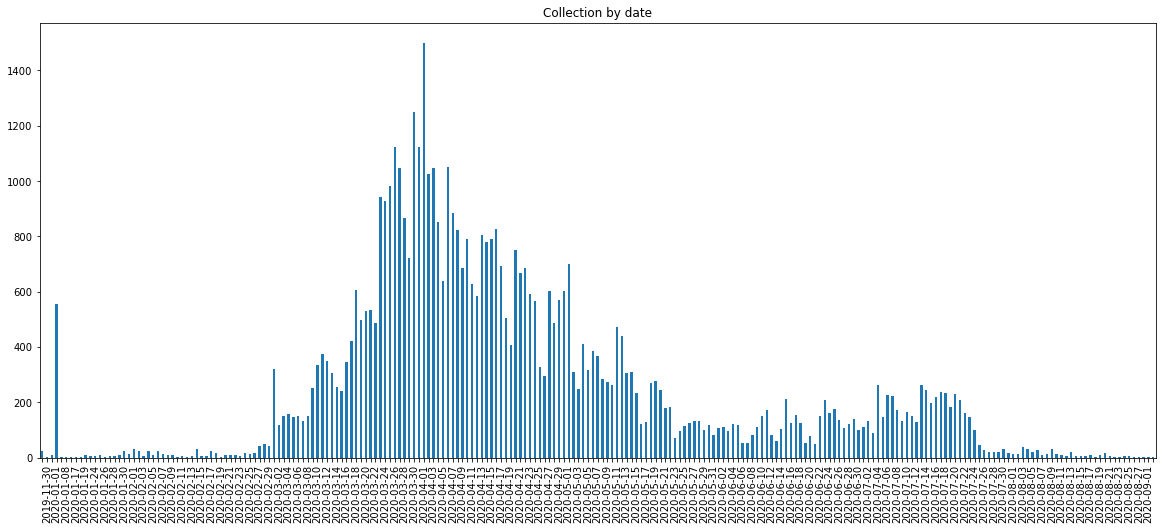

In [15]:
ax = df.collection_date.value_counts().sort_index().plot(kind='bar', figsize=(20, 8))
ax.set_title('Collection by date')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

In [16]:
df['artic'] = df.apply(lambda x: 'artic' in x.to_string().lower(), axis=1)
df.artic.value_counts()

False    55660
True      1012
Name: artic, dtype: int64

In [17]:
df['amplicon_in_metadata'] = df.apply(lambda x: 'amplicon' in x.to_string().lower(), axis=1)

In [18]:
sum(~df.country.isna())

55737

In [19]:
sum(~df.sex.isna())

7083

In [20]:
subset = df[(~df.sex.isna()) & (~df.country.isna())]

In [21]:
RECENT_ILLUMINA_MODELS = ['NextSeq 500', 'NextSeq 550', 'Illumina NovaSeq 6000']
NANOPORE_MODELS = ['GridION', 'PromethION', 'MinION'] # Include MinION ?

In [22]:
illumina = subset[subset.instrument_model.isin(RECENT_ILLUMINA_MODELS)]
illumina

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex,artic,amplicon_in_metadata
run_accession,,,,,,,,,,,,,,,,,,,,,
ERR4238187,SAMEA6915235,47444042.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,4.69982e+07,BAM,male,NaN,2697049,male,True,True
ERR4238188,SAMEA6915392,24758232.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-13,United Kingdom,NaN,...,NaN,NaN,2.44243e+07,BAM,female,NaN,2697049,female,True,True
ERR4238189,SAMEA6915293,49131355.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,4.83486e+07,BAM,male,NaN,2697049,male,True,True
ERR4238190,SAMEA6915304,45016521.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-02,United Kingdom,NaN,...,NaN,NaN,4.43407e+07,BAM,female,NaN,2697049,female,True,True
ERR4238191,SAMEA6915524,12799114.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,1.26565e+07,BAM,male,NaN,2697049,male,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12537597,SAMN15918077,236250203.0,NaN,NaN,SUB8055754,NaN,Microbiological Diagnostic Unit - Public Healt...,2020-07-18,Australia: Victoria,NaN,...,NaN,NaN,NaN,NaN,male,NaN,2697049,male,False,True
SRR12537598,SAMN15918076,248067278.0,NaN,NaN,SUB8055754,NaN,Microbiological Diagnostic Unit - Public Healt...,2020-07-18,Australia: Victoria,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,False,True
SRR12537599,SAMN15918075,188068675.0,NaN,NaN,SUB8055754,NaN,Microbiological Diagnostic Unit - Public Healt...,2020-07-18,Australia: Victoria,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,False,True


In [23]:
nanopore = subset[subset.instrument_model.isin(NANOPORE_MODELS)]
nanopore

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex,artic,amplicon_in_metadata
run_accession,,,,,,,,,,,,,,,,,,,,,
SRR11397722,SAMN14422707,381016503.0,NaN,NaN,SUB7178017,NaN,Victorian Infectious Diseases Reference Labora...,2020-02-08,"Australia: Melbourne, Victoria",NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,False,True
SRR11397723,SAMN14422706,187769236.0,NaN,NaN,SUB7178017,NaN,Victorian Infectious Diseases Reference Labora...,2020-03-06,"Australia: Melbourne, Victoria",NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,False,True
SRR11397724,SAMN14422705,221112159.0,NaN,NaN,SUB7178017,NaN,Victorian Infectious Diseases Reference Labora...,2020-03-05,"Australia: Melbourne, Victoria",NaN,...,NaN,NaN,NaN,NaN,male,NaN,2697049,male,False,True
SRR11397725,SAMN14422704,236813764.0,NaN,NaN,SUB7178017,NaN,Victorian Infectious Diseases Reference Labora...,2020-03-02,"Australia: Melbourne, Victoria",NaN,...,NaN,NaN,NaN,NaN,male,NaN,2697049,male,False,True
SRR11397726,SAMN14422703,363340838.0,NaN,NaN,SUB7178017,NaN,Victorian Infectious Diseases Reference Labora...,2020-01-25,"Australia: Melbourne, Victoria",NaN,...,NaN,NaN,NaN,NaN,male,NaN,2697049,male,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12480580,SAMN15691610,6835912.0,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-24,USA: Maryland,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,True,True
SRR12480581,SAMN15691609,7529477.0,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-30,USA: Maryland,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,True,True
SRR12480582,SAMN15691608,6314669.0,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-28,USA: DC,NaN,...,NaN,NaN,NaN,NaN,male,NaN,2697049,male,True,True


In [24]:
df.library_strategy.value_counts()

AMPLICON            49735
RNA-Seq              3350
WGS                  2551
Targeted-Capture      711
WGA                   250
OTHER                  75
Name: library_strategy, dtype: int64

In [25]:
illumina.library_strategy.value_counts()

AMPLICON    5165
WGS           81
RNA-Seq       12
Name: library_strategy, dtype: int64

In [26]:
nanopore.library_strategy.value_counts()

AMPLICON    465
WGS           1
Name: library_strategy, dtype: int64

In [27]:
illumina.library_selection.unique()

array(['PCR', 'Hybrid Selection', 'RANDOM'], dtype=object)

In [28]:
illumina.library_source.unique()

array(['VIRAL RNA', 'GENOMIC', 'TRANSCRIPTOMIC'], dtype=object)

In [29]:
nanopore_no_metadata_filter = df[df.instrument_model.isin(NANOPORE_MODELS)]
nanopore_no_metadata_filter

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex,artic,amplicon_in_metadata
run_accession,,,,,,,,,,,,,,,,,,,,,
ERR4080473,SAMEA6798401,158607300.0,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,NaN,NaN,136591936,FASTQ,not provided,NaN,2697049,NaN,False,True
ERR4080474,SAMEA6798402,146257565.0,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,NaN,NaN,125862765,FASTQ,not provided,NaN,2697049,NaN,False,True
ERR4080475,SAMEA6798403,122898175.0,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,NaN,NaN,106116129,FASTQ,not provided,NaN,2697049,NaN,False,True
ERR4080476,SAMEA6798404,165498931.0,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,NaN,NaN,142761688,FASTQ,not provided,NaN,2697049,NaN,False,True
ERR4080477,SAMEA6798405,169444073.0,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,NaN,NaN,146011388,FASTQ,not provided,NaN,2697049,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12480582,SAMN15691608,6314669.0,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-28,USA: DC,NaN,...,NaN,NaN,NaN,NaN,male,NaN,2697049,male,True,True
SRR12480583,SAMN15691607,7533745.0,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-26,USA: DC,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,True,True
SRR12486810,SAMN14647199,86575096.0,NaN,NaN,SUB7942082,NaN,Public Health Ontario,2020-01-23,Canada: Ontario,NaN,...,NaN,NaN,NaN,NaN,male,NaN,2697049,male,False,False


In [30]:
nanopore_no_metadata_filter.library_strategy.value_counts()

AMPLICON    13010
WGS           472
RNA-Seq         5
Name: library_strategy, dtype: int64

In [47]:
metagenomic_nanopore_maybe = nanopore_no_metadata_filter[(nanopore_no_metadata_filter.library_strategy == 'WGS') & (nanopore_no_metadata_filter.artic == False) & (nanopore_no_metadata_filter.amplicon_in_metadata == False)]
metagenomic_nanopore_maybe[['run_accession', 'study_accession']].to_csv('nanopore_metagenomic_accessions.tsv', sep='\t', index=None)
metagenomic_nanopore_maybe

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex,artic,amplicon_in_metadata
run_accession,,,,,,,,,,,,,,,,,,,,,
SRR11140745,SAMN14154204,2.609568e+08,NaN,NaN,SUB6993965,NaN,Wisconsin State Lab of Hygiene,2020-02-14,"USA:WI,Madison",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,False,False
SRR11140747,SAMN14154202,3.590010e+08,NaN,NaN,SUB6993965,NaN,Wisconsin State Lab of Hygiene,2020-02-14,"USA:WI,Madison",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,False,False
SRR11140749,SAMN14154200,3.041134e+08,NaN,NaN,SUB6993965,NaN,Wisconsin State Lab of Hygiene,2020-02-14,"USA:WI,Madison",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,False,False
SRR11140751,SAMN14154198,2.369616e+07,NaN,NaN,SUB6993965,NaN,Wisconsin State Lab of Hygiene,2020-02-14,"USA:WI,Madison",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,False,False
SRR11178050,SAMN14168020,1.569519e+08,NaN,NaN,SUB7021260,NaN,NaN,2020-01-29,Hong Kong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,False,False
SRR11178051,SAMN14168019,4.216227e+08,NaN,NaN,SUB7021260,NaN,NaN,2020-01-27,Hong Kong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,False,False
SRR11178052,SAMN14168018,1.000052e+09,NaN,NaN,SUB7021260,NaN,NaN,2020-01-29,Hong Kong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,False,False
SRR11178053,SAMN14168017,3.636258e+08,NaN,NaN,SUB7021260,NaN,NaN,2020-01-27,Hong Kong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,False,False
SRR11178054,SAMN14168016,3.163351e+08,NaN,NaN,SUB7021260,NaN,NaN,2020-01-27,Hong Kong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,False,False


In [46]:
artic_nanopore_probably = nanopore_no_metadata_filter[(nanopore_no_metadata_filter.library_strategy == 'AMPLICON') & (nanopore_no_metadata_filter.artic == True)]
artic_nanopore_probably[['run_accession', 'study_accession']].to_csv('nanopore_artic_accessions.tsv', sep='\t', index=None)
artic_nanopore_probably

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex,artic,amplicon_in_metadata
run_accession,,,,,,,,,,,,,,,,,,,,,
SRR12336747,SAMN15659003,1.801952e+08,NaN,NaN,SUB7773855,NaN,CNR Virus des Infections Respiratoires - Franc...,2020-03-19,France:Lyon,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,True,True
SRR12336758,SAMN15659002,1.180912e+08,NaN,NaN,SUB7773855,NaN,CNR Virus des Infections Respiratoires - Franc...,2020-03-17,France:Lyon,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,True,True
SRR12336769,SAMN15659001,1.154191e+09,NaN,NaN,SUB7773855,NaN,CNR Virus des Infections Respiratoires - Franc...,2020-04-09,France:Lyon,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,True,True
SRR12336780,SAMN15659000,1.144114e+09,NaN,NaN,SUB7773855,NaN,CNR Virus des Infections Respiratoires - Franc...,2020-04-09,France:Lyon,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,True,True
SRR12336791,SAMN15658999,2.338869e+08,NaN,NaN,SUB7773855,NaN,CNR Virus des Infections Respiratoires - Franc...,2020-03-08,France:Lyon,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12480579,SAMN15691611,NaN,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-23,USA: Maryland,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,True,True
SRR12480580,SAMN15691610,6.835912e+06,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-24,USA: Maryland,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,True,True
SRR12480581,SAMN15691609,7.529477e+06,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-30,USA: Maryland,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,True,True


In [45]:
illumina_metagenomic_probably = illumina[(illumina.library_strategy.isin(['WGS', 'RNA-Seq'])) & (illumina.artic == False) & (illumina.amplicon_in_metadata == False)]
illumina_metagenomic_probably[['run_accession', 'study_accession']].to_csv('illumina_metagenomic_accessions.tsv', sep='\t', index=None)
illumina_metagenomic_probably


,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex,artic,amplicon_in_metadata
run_accession,,,,,,,,,,,,,,,,,,,,,
ERR4450774,SAMEA7175809,1.643639e+08,NaN,NaN,COVID-HUB-PL,ERC000033,Katarzyna Lasinska,2020-05-18,Poland,NaN,...,NaN,NaN,83728034,BAM,female,NaN,2697049,female,False,False
ERR4452719,SAMEA7175809,1.114744e+08,NaN,NaN,COVID-HUB-PL,ERC000033,Katarzyna Lasinska,2020-05-18,Poland,NaN,...,NaN,NaN,56320826,BAM,female,NaN,2697049,female,False,False
ERR4452734,SAMEA7175811,6.885593e+06,NaN,NaN,COVID-HUB-PL,ERC000033,Katarzyna Lasinska,2020-05-19,Poland,NaN,...,NaN,NaN,3696298,BAM,male,NaN,2697049,male,False,False
ERR4452736,SAMEA7175812,1.097800e+07,NaN,NaN,COVID-HUB-PL,ERC000033,Katarzyna Lasinska,2020-05-19,Poland,NaN,...,NaN,NaN,5661267,BAM,female,NaN,2697049,female,False,False
ERR4452737,SAMEA7175813,2.917065e+06,NaN,NaN,COVID-HUB-PL,ERC000033,Katarzyna Lasinska,2020-05-19,Poland,NaN,...,NaN,NaN,1523098,BAM,female,NaN,2697049,female,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12192441,SAMN15379426,8.335258e+09,NaN,NaN,SUB7748555,NaN,Quest Diagnostics,2020-03-12,USA:HI,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,False,False
SRR12192442,SAMN15379425,2.023239e+09,NaN,NaN,SUB7748555,NaN,Quest Diagnostics,2020-03-12,USA:CO,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,False,False
SRR12192444,SAMN15379423,4.033132e+06,NaN,NaN,SUB7748555,NaN,Quest Diagnostics,2020-03-13,USA:CA,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,False,False


In [44]:
illumina_ampliconic_very_probably= illumina[(illumina.library_strategy == 'AMPLICON') & (illumina.artic == True)]
illumina_ampliconic_very_probably[['run_accession', 'study_accession']].to_csv('illumina_artic_accessions.tsv', sep='\t', index=None)
illumina_ampliconic_very_probably

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex,artic,amplicon_in_metadata
run_accession,,,,,,,,,,,,,,,,,,,,,
ERR4238187,SAMEA6915235,47444042.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,4.69982e+07,BAM,male,NaN,2697049,male,True,True
ERR4238188,SAMEA6915392,24758232.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-13,United Kingdom,NaN,...,NaN,NaN,2.44243e+07,BAM,female,NaN,2697049,female,True,True
ERR4238189,SAMEA6915293,49131355.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,4.83486e+07,BAM,male,NaN,2697049,male,True,True
ERR4238190,SAMEA6915304,45016521.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-02,United Kingdom,NaN,...,NaN,NaN,4.43407e+07,BAM,female,NaN,2697049,female,True,True
ERR4238191,SAMEA6915524,12799114.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,1.26565e+07,BAM,male,NaN,2697049,male,True,True
ERR4238193,SAMEA6915234,23694399.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,2.34036e+07,BAM,female,NaN,2697049,female,True,True
ERR4238194,SAMEA6915400,13675463.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-12,United Kingdom,NaN,...,NaN,NaN,1.34489e+07,BAM,female,NaN,2697049,female,True,True
ERR4238196,SAMEA6915362,15539103.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,1.52951e+07,BAM,female,NaN,2697049,female,True,True
ERR4238197,SAMEA6915466,403743672.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-12,United Kingdom,NaN,...,NaN,NaN,4.0005e+08,BAM,female,NaN,2697049,female,True,True


In [35]:
illumina_ampliconic_probably = illumina[(illumina.library_strategy == 'AMPLICON')]
illumina_ampliconic_probably

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex,artic,amplicon_in_metadata
run_accession,,,,,,,,,,,,,,,,,,,,,
ERR4238187,SAMEA6915235,47444042.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,4.69982e+07,BAM,male,NaN,2697049,male,True,True
ERR4238188,SAMEA6915392,24758232.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-13,United Kingdom,NaN,...,NaN,NaN,2.44243e+07,BAM,female,NaN,2697049,female,True,True
ERR4238189,SAMEA6915293,49131355.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,4.83486e+07,BAM,male,NaN,2697049,male,True,True
ERR4238190,SAMEA6915304,45016521.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-02,United Kingdom,NaN,...,NaN,NaN,4.43407e+07,BAM,female,NaN,2697049,female,True,True
ERR4238191,SAMEA6915524,12799114.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,NaN,NaN,1.26565e+07,BAM,male,NaN,2697049,male,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12537597,SAMN15918077,236250203.0,NaN,NaN,SUB8055754,NaN,Microbiological Diagnostic Unit - Public Healt...,2020-07-18,Australia: Victoria,NaN,...,NaN,NaN,NaN,NaN,male,NaN,2697049,male,False,True
SRR12537598,SAMN15918076,248067278.0,NaN,NaN,SUB8055754,NaN,Microbiological Diagnostic Unit - Public Healt...,2020-07-18,Australia: Victoria,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,False,True
SRR12537599,SAMN15918075,188068675.0,NaN,NaN,SUB8055754,NaN,Microbiological Diagnostic Unit - Public Healt...,2020-07-18,Australia: Victoria,NaN,...,NaN,NaN,NaN,NaN,female,NaN,2697049,female,False,True


In [104]:
!grep SRR11393275 ../current_metadata_ena.tsv

SAMN14428240	188942237			SUB7181455		UWHC	2020-03-15	USA:Wisconsin		GridION sequencing; swab_artic_4	SRX7972384	WI5_artic	GridION sequencing; swab_artic_4	fasp.sra.ebi.ac.uk:/vol1/fastq/SRR113/075/SRR11393275/SRR11393275_1.fastq.gz	197659362	ftp.sra.ebi.ac.uk/vol1/fastq/SRR113/075/SRR11393275/SRR11393275_1.fastq.gz	0f8d0fdbfc487c81494cab879eef9c1c	2020-03-24	2020-03-24	Homo sapiens		9606	GridION	OXFORD_NANOPORE		homo sapien	nasal swab	2020-03-24	43.0731	SINGLE	WI5_artic	PCR	VIRAL RNA	WGS	43.0731 N 89.4012 W	-89.4012	475250	SRR11393275	hCoV-19_USA_WI-05_2020_ARTIC.fastq	SAMN14428240	ARTIC_hCoV-19/USA/WI-05/2020	This sample has been submitted by pda|kmbraun2 on 2020-03-24; Severe acute respiratory syndrome coronavirus 2		This sample has been submitted by pda|kmbraun2 on 2020-03-24; Severe acute respiratory syndrome coronavirus 2				Severe acute respiratory syndrome coronavirus 2	fasp.sra.ebi.ac.uk:/vol1/srr/SRR113/075/SRR11393275	173127508	ftp.sra.ebi.ac.uk/vol1/srr/SRR113/075/SRR1139327

In [106]:
maybe_not_artic = df[~df.apply(lambda x: 'artic' in x.to_string().lower(), axis=1)]

In [107]:
maybe_not_artic

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,study_alias,study_title,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex
run_accession,,,,,,,,,,,,,,,,,,,,,
ERR4080473,SAMEA6798401,1.586073e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,136591936,FASTQ,not provided,NaN,2697049,NaN
ERR4080474,SAMEA6798402,1.462576e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,125862765,FASTQ,not provided,NaN,2697049,NaN
ERR4080475,SAMEA6798403,1.228982e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,106116129,FASTQ,not provided,NaN,2697049,NaN
ERR4080476,SAMEA6798404,1.654989e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,142761688,FASTQ,not provided,NaN,2697049,NaN
ERR4080477,SAMEA6798405,1.694441e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,146011388,FASTQ,not provided,NaN,2697049,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12554748,SAMN15949722,1.199726e+07,NaN,NaN,SUB8072363,NaN,Texas Department of State Health Services,2020-03-16,USA:TX,NaN,...,PRJNA639066,TX SARS-CoV-2 Sequencing,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN
SRR12554749,SAMN15949721,1.128326e+07,NaN,NaN,SUB8072363,NaN,Texas Department of State Health Services,2020-03-11,USA:TX,NaN,...,PRJNA639066,TX SARS-CoV-2 Sequencing,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN
SRR12588591,SAMN16058334,2.747873e+09,NaN,NaN,SUB8094684,NaN,University of Washington Virology Lab,NaN,USA,NaN,...,PRJNA610428,Washington SARS-CoV-2 isolate sequences,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN


In [108]:
df

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,study_alias,study_title,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex
run_accession,,,,,,,,,,,,,,,,,,,,,
ERR4080473,SAMEA6798401,1.586073e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,136591936,FASTQ,not provided,NaN,2697049,NaN
ERR4080474,SAMEA6798402,1.462576e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,125862765,FASTQ,not provided,NaN,2697049,NaN
ERR4080475,SAMEA6798403,1.228982e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,106116129,FASTQ,not provided,NaN,2697049,NaN
ERR4080476,SAMEA6798404,1.654989e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,142761688,FASTQ,not provided,NaN,2697049,NaN
ERR4080477,SAMEA6798405,1.694441e+08,NaN,NaN,AALBORG UNIVERSITY,ERC000033,not provided,2020-03-10,Denmark,NaN,...,ena-STUDY-AALBORG UNIVERSITY-23-04-2020-12:47:...,Corona virus sequencing in Denmark,NaN,NaN,146011388,FASTQ,not provided,NaN,2697049,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12554748,SAMN15949722,1.199726e+07,NaN,NaN,SUB8072363,NaN,Texas Department of State Health Services,2020-03-16,USA:TX,NaN,...,PRJNA639066,TX SARS-CoV-2 Sequencing,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN
SRR12554749,SAMN15949721,1.128326e+07,NaN,NaN,SUB8072363,NaN,Texas Department of State Health Services,2020-03-11,USA:TX,NaN,...,PRJNA639066,TX SARS-CoV-2 Sequencing,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN
SRR12588591,SAMN16058334,2.747873e+09,NaN,NaN,SUB8094684,NaN,University of Washington Virology Lab,NaN,USA,NaN,...,PRJNA610428,Washington SARS-CoV-2 isolate sequences,NaN,NaN,NaN,NaN,NaN,NaN,2697049,NaN


In [109]:
defintiely_artic = df[df.apply(lambda x: 'artic' in x.to_string().lower(), axis=1)]

In [110]:
defintiely_artic

,accession,base_count,cell_line,cell_type,center_name,checklist,collected_by,collection_date,country,cram_index_ftp,...,study_alias,study_title,sub_species,sub_strain,submitted_bytes,submitted_format,submitted_host_sex,submitted_sex,tax_id,sex
run_accession,,,,,,,,,,,,,,,,,,,,,
ERR4238187,SAMEA6915235,47444042.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,ena-STUDY-Quadram Institute Bioscience-05-06-2...,Large scale multiplexing of SARS-CoV-2 genomes...,NaN,NaN,4.69982e+07,BAM,male,NaN,2697049,male
ERR4238188,SAMEA6915392,24758232.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-13,United Kingdom,NaN,...,ena-STUDY-Quadram Institute Bioscience-05-06-2...,Large scale multiplexing of SARS-CoV-2 genomes...,NaN,NaN,2.44243e+07,BAM,female,NaN,2697049,female
ERR4238189,SAMEA6915293,49131355.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,ena-STUDY-Quadram Institute Bioscience-05-06-2...,Large scale multiplexing of SARS-CoV-2 genomes...,NaN,NaN,4.83486e+07,BAM,male,NaN,2697049,male
ERR4238190,SAMEA6915304,45016521.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-02,United Kingdom,NaN,...,ena-STUDY-Quadram Institute Bioscience-05-06-2...,Large scale multiplexing of SARS-CoV-2 genomes...,NaN,NaN,4.43407e+07,BAM,female,NaN,2697049,female
ERR4238191,SAMEA6915524,12799114.0,NaN,NaN,Quadram Institute Bioscience,ERC000033,Justin O&apos;Grady,2020-05-11,United Kingdom,NaN,...,ena-STUDY-Quadram Institute Bioscience-05-06-2...,Large scale multiplexing of SARS-CoV-2 genomes...,NaN,NaN,1.26565e+07,BAM,male,NaN,2697049,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR12480579,SAMN15691611,NaN,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-23,USA: Maryland,NaN,...,PRJNA650037,Johns Hopkins Viral Genomics of Severe acute r...,NaN,NaN,NaN,NaN,female,NaN,2697049,female
SRR12480580,SAMN15691610,6835912.0,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-24,USA: Maryland,NaN,...,PRJNA650037,Johns Hopkins Viral Genomics of Severe acute r...,NaN,NaN,NaN,NaN,female,NaN,2697049,female
SRR12480581,SAMN15691609,7529477.0,NaN,NaN,SUB7938744,NaN,Johns Hopkins Pathology,2020-03-30,USA: Maryland,NaN,...,PRJNA650037,Johns Hopkins Viral Genomics of Severe acute r...,NaN,NaN,NaN,NaN,female,NaN,2697049,female


In [111]:
metagenomic_maybe['artic'] = False

/Users/mvandenb/miniconda3/envs/sars_cov2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
df['artic'].value_counts()

False    55660
True      1012
Name: artic, dtype: int64